In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [3]:
pubg_df = pd.read_csv('C:\\Users\welcome\Data Science\Python\Data\\pubg_data.csv')

In [4]:
pubg_df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [42]:
pubg_df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [261]:
pubg_df.dtypes

Unnamed: 0           int64
Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints         float64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

## Data Cleaning / Wrangling

In [83]:
pubg_df.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [243]:
pubg_df['rankPoints'].replace(-1,np.nan, inplace = True)

In [318]:
pubg_df['headshot%'] = (pubg_df['headshotKills'] / pubg_df['kills'])*100

## Univariate Analysis

In [96]:
len(pubg_df['groupId'].value_counts().index)

870622

Total No of Groups in this dataset are 870622

In [97]:
len(pubg_df['matchId'].value_counts().index)

47951

Total Matches in this Data are 47951

In [101]:
pubg_df['assists'].value_counts().index.max()

17

Highest No. of Assists by a player : 17

In [133]:
pubg_df['DBNOs'].value_counts().index.max()

35

Stands for 'Down But No Out'. During Duo or squad play, when you lose all your HP, you do into this mode. Your duo or squad members can heal you and that is why we don't count this as an out.  Highest No. of DBNOs recieved by a player is 35

In [125]:
pubg_df['heals'].value_counts().index.max()

73

Highest No. of Heals given by a player : 17

<AxesSubplot:xlabel='killPoints', ylabel='Density'>

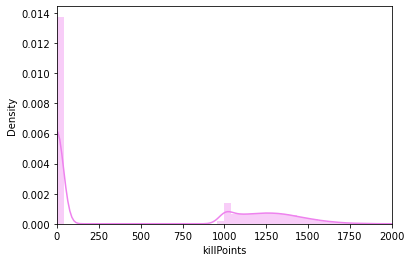

In [236]:
plt.xlim(0,200*10)
sns.distplot(pubg_df['killPoints'], color = 'violet')

Most of the Players have killPoints under 100 and also certain Pro Players have killPoints between 900 to 1800. 

In [139]:
pubg_df['kills'].value_counts().index.max()

72

In [148]:
pubg_df['killStreaks'].value_counts().index.max()

20

Max Kills by a Player : 72

Max killStreaks by a Player : 20

In [246]:
pubg_df['longestKill'].value_counts().index.max()

1040.0

Longest distance kill a player can get is 1040 metres away.

In [151]:
pubg_df['matchDuration'].mean()

1579.347832500706

Average Minutes played by a Player : 1579.35 

In [152]:
pubg_df['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

<AxesSubplot:xlabel='matchType', ylabel='count'>

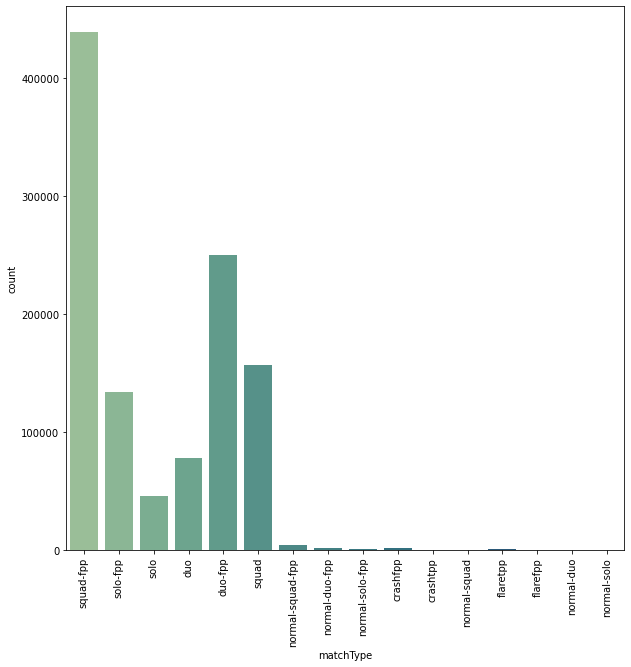

In [359]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.countplot(pubg_df['matchType'], palette = 'crest')

Most Players plays Squad-FPP, Duo-FPP, Squad, Solo-FPP, Duo and Solo Mode.

<AxesSubplot:ylabel='rankPoints'>

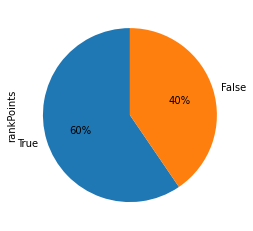

In [244]:
(pubg_df['rankPoints']>1200).value_counts().plot.pie(autopct = '%0.0f%%', startangle = 90)

Only 60% Players have more than 1200 points. It means they recieve a rank such as Bronze, Silver, Gold etc. and rest 40% are Unranked

In [164]:
pubg_df['revives'].value_counts().index.max()

23

Highest Revives by a player : 23

<AxesSubplot:xlabel='rideDistance', ylabel='Density'>

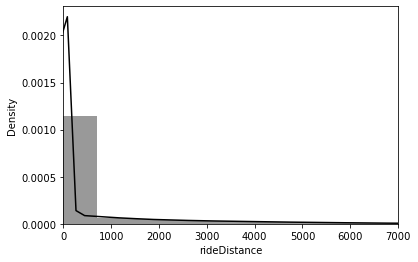

In [338]:
plt.xlim(0,100*70)
sns.distplot(pubg_df['rideDistance'], color = 'black')

Most of the Players have covered distance is under 700m

<AxesSubplot:xlabel='roadKills', ylabel='Density'>

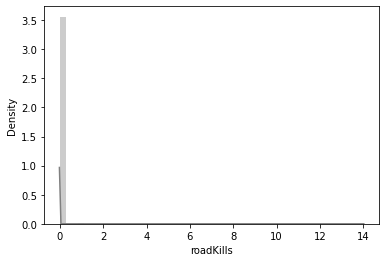

In [351]:
sns.distplot(pubg_df['roadKills'], color = 'grey')

In [178]:
(pubg_df['roadKills']>1).value_counts()/len(pubg_df)*100

False    99.958983
True      0.041017
Name: roadKills, dtype: float64

Only 0.04% players got a kill on Road

<AxesSubplot:xlabel='winPoints', ylabel='Density'>

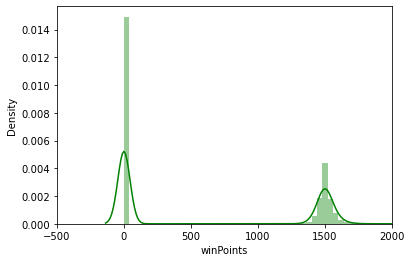

In [220]:
plt.xlim(-500,200*10)
sns.distplot(pubg_df['winPoints'], color = 'green')

Most of the Players have WinPoints between 0 to 250. We can consider them to be the Newbie in this Game. Some Players have WinPoints greater than 1400, we can consider them as Pros.

## Bivariate Analysis

<AxesSubplot:xlabel='kills', ylabel='boosts'>

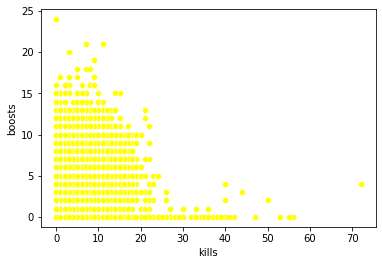

In [276]:
sns.scatterplot(y = pubg_df['boosts'], x = pubg_df['kills'], color='yellow')

In [226]:
pubg_df['boosts'].corr(pubg_df['kills'])

0.4994784181833401

From above Scatterplot, you can say there is certain corelation between boosts and kills. As you take more boosts, your hp increases which results into getting more kills.

In [299]:
pubg_df1 = pubg_df.loc[(pubg_df['DBNOs']>0) & (pubg_df['kills']>0)]

<AxesSubplot:xlabel='DBNOs', ylabel='kills'>

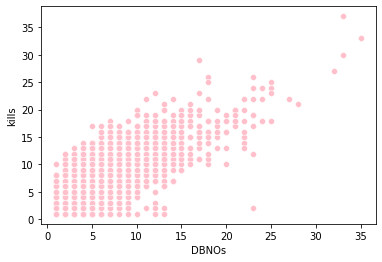

In [300]:
sns.scatterplot(x = pubg_df1['DBNOs'], y = pubg_df1['kills'], color='pink')

In [295]:
pubg_df1['DBNOs'].corr(pubg_df1['kills'])

0.7629520471058082

There is certain relation between DBNOs and kills because as you get one revival, you are ready for getting more Kills.

<AxesSubplot:xlabel='matchType', ylabel='vehicleDestroys'>

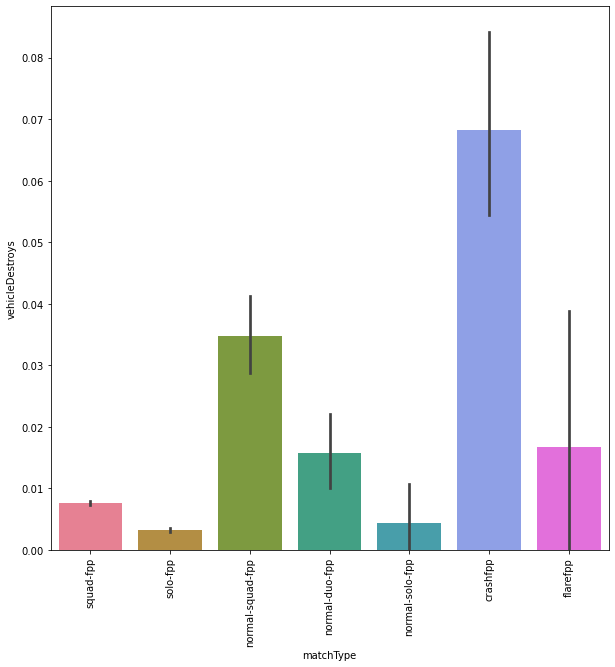

In [352]:
pubg_fpp_df = pubg_df.loc[pubg_df['matchType'].isin(['solo-fpp','duofpp','squad-fpp','normal-squad-fpp','crashfpp','normal-duo-fpp','normal-solo-fpp','flarefpp'])]
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.barplot(x = pubg_fpp_df['matchType'], y = pubg_fpp_df['vehicleDestroys'], palette='husl')

You can get to see more Vehicle Destroys in Normal-Squad, Crash, Flare and Normal-Duo Mode in FPP

<AxesSubplot:xlabel='matchType', ylabel='teamKills'>

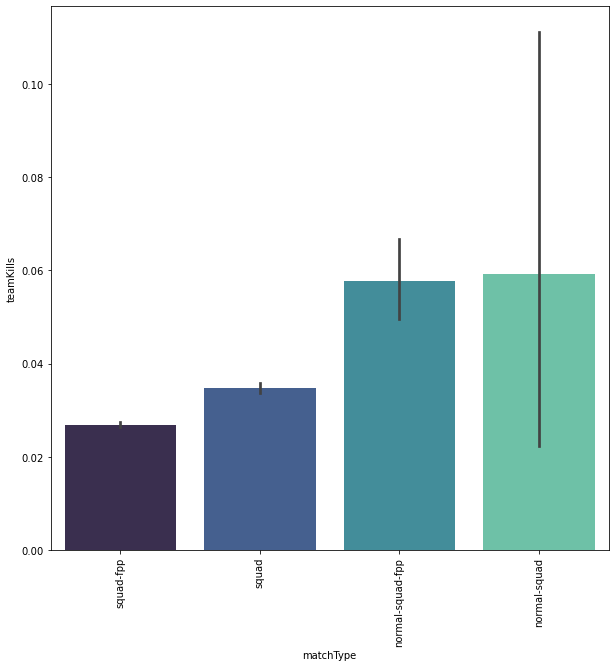

In [353]:
pubg_fpp_VS_tpp = pubg_df.loc[pubg_df['matchType'].isin(['squad-fpp','normal-squad-fpp','normal-squad','squad'])] 

plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.barplot(x = pubg_fpp_VS_tpp['matchType'], y = pubg_fpp_VS_tpp['teamKills'], palette = 'mako')

There is not much difference in Squad Mode in FPP and TPP. But Squad-FPP and Squad gets less kills than Normal-Squad-FPP and Normal-Squad. This is due to participation of less players in Squad-FPP and Squad than Normal-Squad-FPP and Normal-Squad.

In [334]:
pubg_df[['headshot%','kills']].loc[(pubg_df['headshot%']>80)].value_counts().sum()

63860

In [333]:
pubg_df[['headshot%','kills']].loc[(pubg_df['headshot%']>80)].value_counts().sum()/len(pubg_df)*100

5.744138478172093

Only 5.7% of Players have more than 80% headshot Percentage

<AxesSubplot:xlabel='matchType', ylabel='longestKill'>

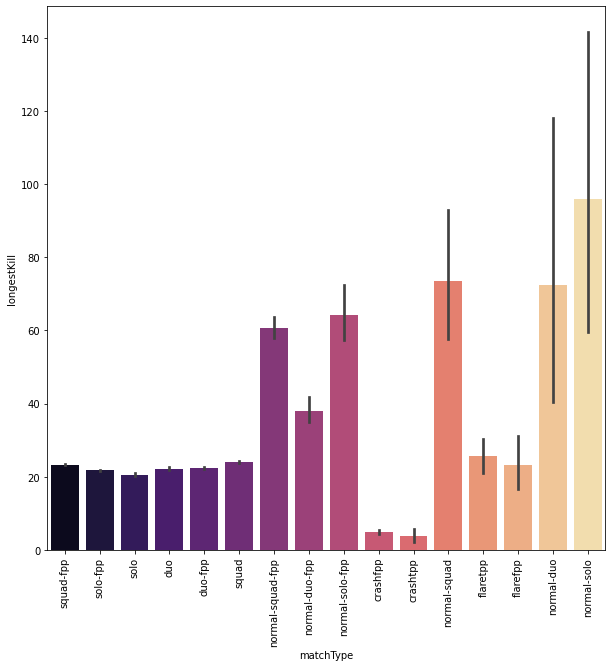

In [360]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.barplot(x = pubg_df['matchType'], y = pubg_df['longestKill'], palette='magma')

We have to see more no of longest kills in normal-solo, normal-duo, normal-squad and normal-solo-fpp, normal-duo-fpp, normal-squad-fpp due to more no of participating players.

<AxesSubplot:>

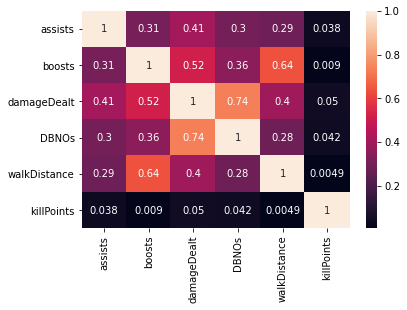

In [355]:
sns.heatmap(pubg_df[['assists', 'boosts', 'damageDealt', 'DBNOs', 'walkDistance', 'killPoints']].corr(), annot=True)

1. There is corelation between boosts and DBNOs because after revival players need boosts to increase their HPs.
2. Boosts are used to increase the HPs, hence there is certain corelation between Boosts and Damage Dealts.
3. Players who take DBNOs have more Damages due to change in HP.

## Conclusion

1.  Total No of Groups in this dataset : 870622  

2.  Total Matches in this Data : 47951

3.  Highest No. of Assists by a player : 17

4.  Stands for 'Down But No Out'. During Duo or squad play, when you lose all your HP, you do into this mode. Your duo or squad     members can heal you and that is why we don't count this as an out. Highest No. of DBNOs recieved by a player : 35

5.  Highest No. of Heals given by a player : 17

6.  Most of the Players have killPoints under 100 and also certain Pro Players have killPoints between 900 to 1800.

7.  Max Kills by a Player : 72. Max killStreaks by a Player : 20

8.  Average Minutes played by a Player : 1579.35

9.  Longest distance kill a player can get is 1040 metres away.

10. Most Players plays Squad-FPP, Duo-FPP, Squad, Solo-FPP, Duo and Solo Mode.

11. Only 60% Players have more than 1200 points. It means they recieve a rank such as Bronze, Silver, Gold etc. and rest 40% are     Unranked.

12. Highest Revives by a player : 23

13. Most of the Players have covered distance through vehicle is under 700m.

14. Only 0.04% players got a kill on Road.

15. Most of the Players have WinPoints between 0 to 250. We can consider them to be the Newbie in this Game. Some Players have       WinPoints greater than 1400, we can consider them as Pros.

16. As you take more boosts, your hp increases which results into getting more kills.

17. There is certain relation between DBNOs and kills because as you get a revival, you are ready for getting more Kills.

18. You can get to see more Vehicle Destroys in Normal-Squad, Crash, Flare and Normal-Duo Mode in FPP.

19. There is not much difference in Squad Mode in FPP and TPP. But Squad-FPP and Squad gets less kills than Normal-Squad-FPP and     Normal-Squad. This is due to participation of less players in Squad-FPP and Squad than Normal-Squad-FPP and Normal-Squad.

20. Only 5.7% of Players have more than 80% headshot Percentage.

21. There are more no of longest kills in normal-solo, normal-duo, normal-squad and normal-solo-fpp, normal-duo-fpp, normal-         squad-fpp due to more no of participating players. 

22. There is corelation between boosts and DBNOs because after revival players need boosts to increase their HPs.

23. Boosts are used to increase the HPs, hence there is certain corelation between Boosts and Damage Dealts.

24. Players who take DBNOs have more Damages due to change in HP.